In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [0]:
X_test=np.load('/content/drive/My Drive/recognizance2/X_test.npy')

In [0]:
X_test.shape

(281, 224, 224, 3)

In [0]:
X=[]
for i in range(281):
  im1=cv2.resize(X_test[i],(96,96),interpolation = cv2.INTER_AREA)
  X.append(im1)

In [0]:
X=np.array(X)

In [0]:
X.shape

(281, 96, 96, 3)

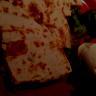

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[0])

In [0]:
from keras.models import load_model

In [0]:
model = load_model("/content/drive/My Drive/recognizance/win_bkr_ps2vggnet.h5")

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)       

In [0]:
pred=model.predict(X)

In [0]:
pred[0].shape

(5,)

In [0]:
res = np.argmax(pred,axis = 1)

In [0]:
print(res)

[0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 3 2 2 0 4 2 0 4 0 2 0 0 0 0 3 0 4 0 0
 0 0 0 3 0 4 0 3 0 0 2 0 0 0 0 2 4 4 0 0 2 0 0 0 0 0 2 2 2 2 4 0 2 2 0 1 0
 2 2 2 2 0 1 3 0 0 1 0 0 1 3 0 3 3 0 1 0 2 2 2 2 0 3 1 2 1 2 3 2 2 0 0 2 2
 2 2 0 2 2 0 2 2 4 0 2 0 0 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 3
 0 0 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 0 3 0 3 3 3 3 0 3 0 3 3 3 3 3
 3 0 3 3 3 4 3 3 0 3 0 3 4 0 3 3 3 3 0 3 3 0 0 3 3 0 3 3 3 3 3 0 3 3 0 3 3
 3 0 3 0 3 2 3 3 2 3 3 3 3 0 3 1 0 3 2 4 0 2 4 4 3 1 4 2 4 4 4 0 4 4 4 4 4
 4 0 4 4 0 4 4 4 2 2 4 4 4 4 4 3 3 4 4 4 2 4]


In [0]:
test=pd.read_csv("/content/drive/My Drive/recognizance2/sample.csv")

In [0]:
test.head()

,image,label
0,0.jpg,0
1,1.jpg,0
2,10.jpg,0
3,11.jpg,0
4,12.jpg,0


In [0]:
test['label']=res

In [0]:
test

,image,label
0,0.jpg,0
1,1.jpg,0
2,10.jpg,0
3,11.jpg,0
4,12.jpg,0
...,...,...
276,276.jpg,4
277,277.jpg,4
278,278.jpg,4
279,279.jpg,2


In [0]:
test.to_csv("sub1.csv",index=False)

In [0]:
data=pd.read_csv('sub1.csv')

In [0]:
data

,image,label
0,0.jpg,0
1,1.jpg,0
2,10.jpg,0
3,11.jpg,0
4,12.jpg,0
...,...,...
276,276.jpg,4
277,277.jpg,4
278,278.jpg,4
279,279.jpg,2
